# Handwritten Digit Classification in Tensorflow

**TensorFlow** is an open-source Python library developed by the Google Brain labs for deep learning research.
The objective here is to take hand-drawn images of the numbers 0-9  and build and train a neural network to recognize and predict the correct label for the digit displayed. The dataset we will be using is called the **MNIST** dataset, and it is a classic in the machine learning community. This dataset is made up of images of handwritten digits, 28x28 pixels in size. Here are some examples of the digits included in the dataset:

![alt text](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

## Step 1: Import MNIST Dataset

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.examples.tutorials.mnist import input_data # Download MNIST Dataset

### Ground truth as one -hot encoding for values in the range 0-9

When reading in the data, we are using one-hot-encoding to represent the labels (the actual digit drawn, e.g. "3") of the images. One-hot-encoding uses a vector of binary values to represent numeric or categorical values. As our labels are for the digits 0-9, the vector contains ten values, one for each possible digit. One of these values is set to 1, to represent the digit at that index of the vector, and the rest are set to 0. For example, the digit 3 is represented using the vector [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]. As the value at index 3 is stored as 1, the vector therefore represents the digit 3. 

In [2]:
# Read the input data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True) # y labels are one-hot encoded

W0726 07:07:04.860551 140406425028480 deprecation.py:323] From <ipython-input-2-64040bb782c2>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0726 07:07:04.863049 140406425028480 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0726 07:07:04.865444 140406425028480 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instruction

Extracting MNIST_data/train-images-idx3-ubyte.gz


W0726 07:07:05.115927 140406425028480 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0726 07:07:05.118781 140406425028480 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0726 07:07:05.172264 140406425028480 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be remove

Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Training image shape (55000, 784)
Training labels shape (55000, 10)
Shape of an image (1, 784)


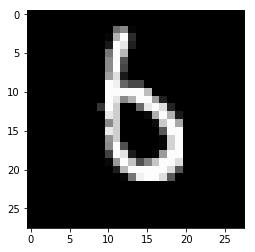

In [3]:
#Explore the data
sample_image = mnist.train.next_batch(1)[0]
print("Training image shape", mnist.train.images.shape)
print("Training labels shape", mnist.train.labels.shape)
print("Shape of an image", sample_image.shape)
sample_image = sample_image.reshape([28, 28])
plt.imshow(sample_image,cmap = 'gray')

In [0]:
#---------- Train, val and test dataset ----------# 
n_train = mnist.train.num_examples  # 55,000
n_validation = mnist.validation.num_examples  # 5000
n_test = mnist.test.num_examples  # 10,000

## Step 2: Defining the Neural Network architecture
The architecture of the neural network refers to elements such as the number of layers in the network, the number of units in each layer, and how the units are connected between layers. In the inline below, add the number of units per layer in global variables. 


In [0]:
n_input = 784  # input layer (28x28 pixels)
n_hidden1 = 512  # 1st hidden layer
n_hidden2 = 256  # 2nd hidden layer
n_hidden3 = 128  # 3rd hidden layer
n_output = 10  # output layer (0-9 digits)


**Architecture:** ![alt text](https://assets.digitalocean.com/articles/handwriting_tensorflow_python3/cnwitLM.png)

In [0]:
#---------- Define hyperparameters to train neural network ----------# 
learning_rate = 1e-4
n_iterations = 1000
batch_size = 128
dropout = 0.5

The **learning rate** represents how much the parameters will adjust at each step of the learning process. The **number of iterations** refers to how many times we go through the training step, and the **batch size** refers to how many training examples we are using at each step. The **dropout** variable represents a threshold at which we eliminate some units at random. 

## Step 3: Build Computational Graph

In [0]:
# Placeholder is a value that we input when we ask TensorFlow to run a computation.
X = tf.placeholder("float", [None, n_input]) 
#----------  Example: [None, 784], Where None denotes any number of samples of 784 pixels each ----------# 

Y = tf.placeholder("float", [None, n_output])
#---------- Example: [None, 10], Where None denotes any number of samples with 10 possible classes ----------#

#---------- The keep_prob tensor is used to control the dropout rate, and we initialize it as a placeholder rather 
# than an immutable variable because we want to use the same tensor both for training (when dropout is set 
# to 0.5) and testing (when dropout is set to 1.0). ----------#
keep_prob = tf.placeholder(tf.float32)

In [0]:
#---------- Define weights and Biases ----------#

weights = {
    'w1': tf.Variable(tf.truncated_normal([n_input, n_hidden1], stddev=0.1)),
    'w2': tf.Variable(tf.truncated_normal([n_hidden1, n_hidden2], stddev=0.1)),
    'w3': tf.Variable(tf.truncated_normal([n_hidden2, n_hidden3], stddev=0.1)),
    'out': tf.Variable(tf.truncated_normal([n_hidden3, n_output], stddev=0.1)),
}

#---------- Set bias to some constant value ----------#
biases = {
    'b1': tf.Variable(tf.constant(0.1, shape=[n_hidden1])),
    'b2': tf.Variable(tf.constant(0.1, shape=[n_hidden2])),
    'b3': tf.Variable(tf.constant(0.1, shape=[n_hidden3])),
    'out': tf.Variable(tf.constant(0.1, shape=[n_output]))
}

#---------- Note: Weights and bias are assigned as dictionary for ease of access ----------#

In [9]:
#---------- Define Layers ----------#
layer_1 = tf.add(tf.matmul(X, weights['w1']), biases['b1'])
layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
layer_3 = tf.add(tf.matmul(layer_2, weights['w3']), biases['b3'])
layer_drop = tf.nn.dropout(layer_3, keep_prob)
output_layer = tf.matmul(layer_3, weights['out']) + biases['out']
y1 = tf.nn.softmax(output_layer)

W0726 07:07:05.799302 140406425028480 deprecation.py:506] From <ipython-input-9-91707481a6a6>:4: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Loss function and Optimization Algorithm
The final step in building the graph is to define the loss function that we want to optimize. A popular choice of loss function in TensorFlow programs is **cross-entropy**, also known as log-loss, which quantifies the difference between two probability distributions (the predictions and the labels). A perfect classification would result in a cross-entropy of 0, with the loss completely minimized.

We also need to choose the optimization algorithm which will be used to minimize the loss function. A process named **gradient descent optimization** is a common method for finding the (local) minimum of a function by taking iterative steps along the gradient in a negative (descending) direction. There are several choices of gradient descent optimization algorithms already implemented in TensorFlow, and we will be using the Adam optimizer. 

In [10]:
#---------- Loss function used: Cross Entropy ----------#
#---------- Optimization Algo: Gradient Descent Algorithm ----------#

cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(
        labels=Y, logits=output_layer
        ))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

W0726 07:07:05.819406 140406425028480 deprecation.py:323] From <ipython-input-10-8744d5e3ae41>:4: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



## Step 4: Training and Testing

The **training process** involves feeding the training dataset through the graph and optimizing the loss function. Every time the network iterates through a batch of more training images, it updates the parameters to reduce the loss in order to more accurately predict the digits shown. The **testing process** involves running our testing dataset through the trained graph, and keeping track of the number of images that are correctly predicted, so that we can calculate the accuracy.

In correct_pred, we use the arg_max function to compare which images are being predicted correctly by looking at the output_layer (predictions) and Y (labels), and we use the equal function to return this as a list of Booleans. We can then cast this list to floats and calculate the mean to get a total accuracy score. 

In [0]:
correct_pred = tf.equal(tf.argmax(output_layer, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))


In [0]:
#---------- Initialize a session for running the graph ----------#
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [13]:
#---------- Train on mini batches ----------#
for i in range(n_iterations):
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    sess.run(train_step, feed_dict={
        X: batch_x, Y: batch_y, keep_prob: dropout
        })

    # print loss and accuracy (per minibatch)
    if i % 100 == 0:
        minibatch_loss, minibatch_accuracy = sess.run(
            [cross_entropy, accuracy],
            feed_dict={X: batch_x, Y: batch_y, keep_prob: 1.0}
            )
        print(
            "Iteration",
            str(i),
            "\t| Loss =",
            str(minibatch_loss),
            "\t| Accuracy =",
            str(minibatch_accuracy)
            )

Iteration 0 	| Loss = 3.7177055 	| Accuracy = 0.0703125
Iteration 100 	| Loss = 0.6287979 	| Accuracy = 0.8515625
Iteration 200 	| Loss = 0.29593214 	| Accuracy = 0.921875
Iteration 300 	| Loss = 0.31414837 	| Accuracy = 0.9140625
Iteration 400 	| Loss = 0.23724195 	| Accuracy = 0.9375
Iteration 500 	| Loss = 0.23753226 	| Accuracy = 0.9453125
Iteration 600 	| Loss = 0.36376166 	| Accuracy = 0.90625
Iteration 700 	| Loss = 0.36378384 	| Accuracy = 0.8984375
Iteration 800 	| Loss = 0.2209622 	| Accuracy = 0.9453125
Iteration 900 	| Loss = 0.22443202 	| Accuracy = 0.921875


In [14]:
#---------- Compute the results on test data ----------#
test_accuracy = sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1.0})
print("\nAccuracy on test set:", test_accuracy)


Accuracy on test set: 0.9198


##Results

In [15]:
# Display the labels of the selected images
original_images = mnist.test.images[0:10]
original_labels = mnist.test.labels[0:10]
original_labels

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [16]:
# Predict the model on the selected samples
prediction = tf.argmax(y1,1)
prediction_val = prediction.eval(feed_dict={X: original_images, keep_prob: 1.0}, session=sess)
print("predictions", prediction_val)

predictions [7 2 1 0 4 1 4 9 6 9]


Correct label 7
Predicted label: 7


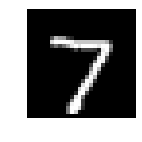

Correct label 2
Predicted label: 2


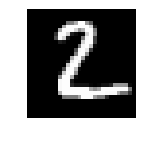

Correct label 1
Predicted label: 1


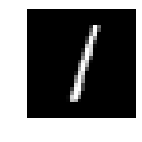

Correct label 0
Predicted label: 0


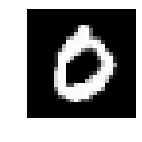

Correct label 4
Predicted label: 4


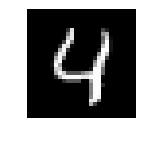

Correct label 1
Predicted label: 1


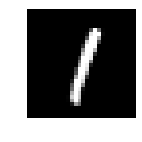

Correct label 4
Predicted label: 4


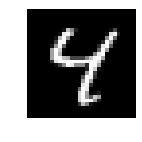

Correct label 9
Predicted label: 9


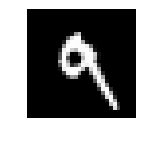

Correct label 5
Predicted label: 6


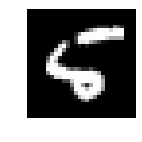

Correct label 9
Predicted label: 9


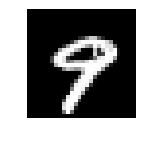

In [17]:
for i in range(0, 10):
    print('Correct label', np.argmax(original_labels[i]))
    print('Predicted label:', prediction_val[i])
    plt.figure(figsize=(2, 2))
    plt.axis('off')
    plt.imshow(original_images[i].reshape([28, 28]),cmap = "gray")
    plt.show()